In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

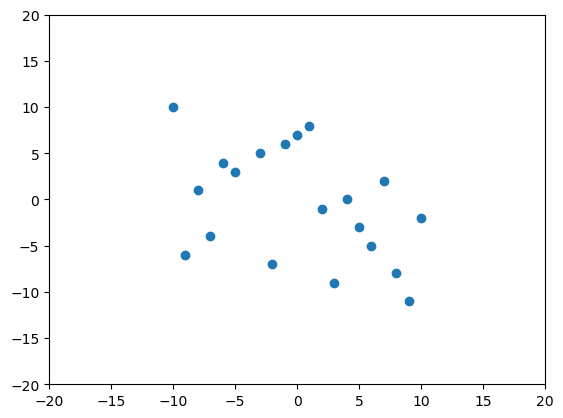

In [2]:
np.random.seed(42)

x = np.random.choice(np.arange(-10, 11), size=20, replace=False)
y = np.random.choice(np.arange(-11, 11), size=20, replace=False)

plt.scatter(x, y)
plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.show()

* 공분산 행렬 Covariance Matrix

In [35]:
print(np.mean(x), np.var(x, ddof=1), np.std(x, ddof=1))
print(np.mean(y), np.var(y, ddof=1), np.std(y, ddof=1))

0.2 39.642105263157895 6.296197682979617
-0.5 37.10526315789474 6.091408963277276


In [ ]:
eig_val, eig_vec = np.linalg.eig(np.cov(x, y))
evec1, evec2 = eig_vec[:, 0], eig_vec[:, 1]
eval1, eval2 = eig_val[0], eig_val[1]

print(evec1, eval1)
print()
print(evec2, eval2)

[ 0.73442865 -0.67868591] 54.47635083988237

[0.67868591 0.73442865] 22.27101758117025


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
def PCA_df(df, scaling=True, ncomponents_=2):
    
    if scaling:
        scaler = StandardScaler()
        df = scaler.fit_transform(df)

    pca = PCA(n_components=ncomponents_)
    pca.fit(df)
    pca_df = pca.transform(df)

    print(f"스케일 데이터 shape: {pca_df.shape}")
    print(f"PCA 데이터 shape: {pca_df.shape}")
    
    pca_columns = ['pca_1','pca_2']

    pca_df = pd.DataFrame(pca_df, columns=pca_columns)
    pca_df['exp_power'] = pca_df['pca_1'] + pca_df['pca_2']
    # pca_df.index = index_
    pca_df.sort_values(by=['exp_power', 'pca_1',], ascending=False, inplace=True)

    return pca, pca_df

In [5]:
def biplot(score, coeff, pcax, pcay, labels=None):
    pca1, pca2 = pcax - 1, pcay - 1
    xs, ys = score.iloc[:, pca1], score.iloc[:, pca2]
    n = score.shape[1]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [39]:
pca, pca_df = PCA_df(df=pd.DataFrame([x, y]).T, scaling=False)

스케일 데이터 shape: (20, 2)
PCA 데이터 shape: (20, 2)


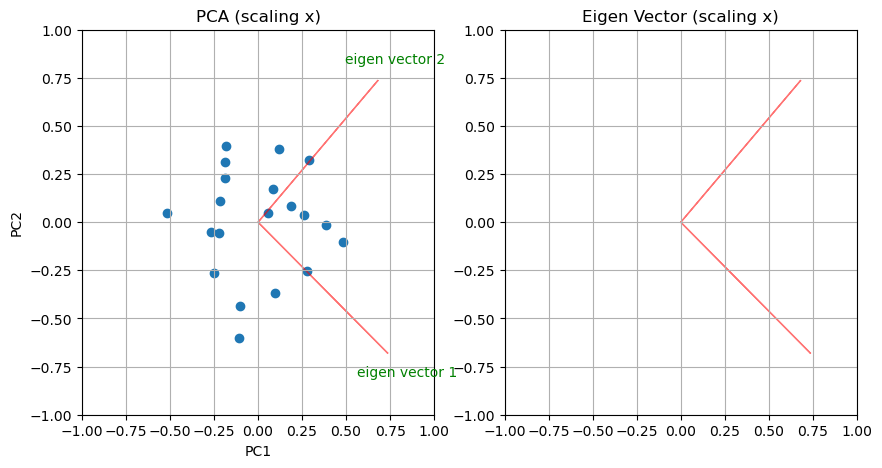

In [74]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
biplot(pca_df.drop('exp_power', axis=1), pca.components_, 1, 2, labels=['eigen vector 1', 'eigen vector 2'])
plt.title('PCA (scaling x)')

plt.subplot(1,2,2)
plt.arrow(0, 0, evec1[0], evec1[1], color='r', alpha=0.5)
plt.arrow(0, 0, evec2[0], evec2[1], color='r', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.title('Eigen Vector (scaling x)')

plt.show()

In [53]:
print(evec1)
print(evec2)

[ 0.73442865 -0.67868591]
[0.67868591 0.73442865]


In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(pd.DataFrame([x, y]).T)
xs, ys = scaled[:, 0], scaled[:, 1]
print(xs)
print(ys)

[-1.66211096  1.10807398  0.78216986 -1.49915891 -0.35849452 -0.84735069
  0.13036164 -1.1732548   1.27102603  0.94512192  0.45626575 -1.33620685
 -0.19554247  1.59693014 -1.01030274  0.2933137  -0.52144658 -0.03259041
  0.61921781  1.43397809]
[ 1.76851903  0.42107596 -0.42107596 -0.92636711 -1.0947975   0.58950634
  1.43165827 -0.58950634 -1.26322788 -0.75793673 -1.43165827  0.25264558
  1.0947975  -0.25264558  0.75793673 -0.08421519  0.92636711  1.26322788
  0.08421519 -1.76851903]


In [8]:
eig_val2, eig_vec2 = np.linalg.eig(np.cov([xs, ys]))
evec3, evec4 = eig_vec2[:, 0], eig_vec2[:, 1]
eval3, eval4 = eig_val2[0], eig_val2[1]

print(evec3, eval3)
print(evec4, eval4)

[-0.70710678 -0.70710678] 0.6120498124436515
[ 0.70710678 -0.70710678] 1.4932133454510854


In [9]:
xy_scaled_df = pd.DataFrame({'x_scaled':xs, 'y_scaled':ys})
pca2, pca_df2 = PCA_df(df=xy_scaled_df, scaling=False)

스케일 데이터 shape: (20, 2)
PCA 데이터 shape: (20, 2)


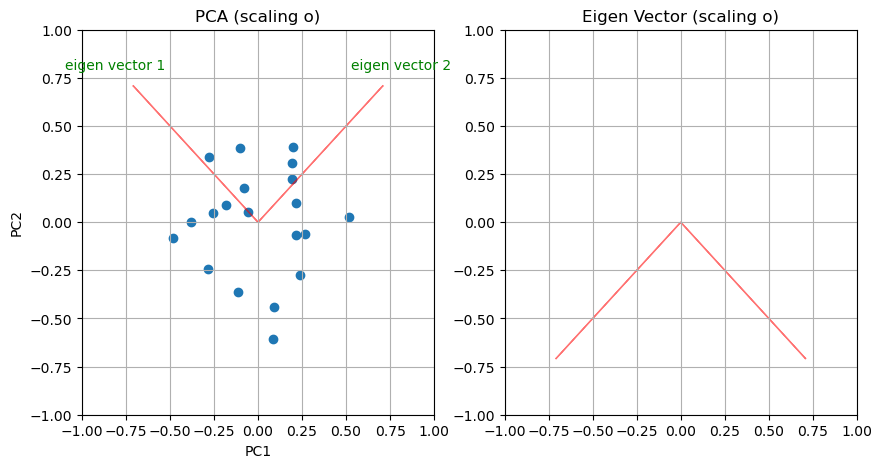

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
biplot(pca_df2.drop('exp_power', axis=1), pca2.components_, 1, 2, labels=['eigen vector 1', 'eigen vector 2'])
plt.title('PCA (scaling o)')

plt.subplot(1,2,2)
plt.arrow(0, 0, evec3[0], evec3[1], color='r', alpha=0.5)
plt.arrow(0, 0, evec4[0], evec4[1], color='r', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.title('Eigen Vector (scaling o)')

plt.show()

In [11]:
pca2.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [13]:
print(evec3)
print(evec4)

[-0.70710678 -0.70710678]
[ 0.70710678 -0.70710678]


In [12]:
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.70927634, 0.29072366]), np.float64(0.9999999999999999))

* 0번 인덱스 설명

    - evec3 : [-0.70710678 -0.70710678]
    - evec4 : [ 0.70710678 -0.70710678]

    x_scaled, y_scaled : 기존 0번 인덱스의 x, y 값이 표준화된 데이터  
    pca_1, 2 : 기존 x, y 값이 고유벡터에 의해 선형변환된 데이터
    - pca_1 : (-1.6621 * -0.7071) + (1.7685 * 0.7071) ≈ 1.1756 + 1.2502 ≈ 2.43
    - pca_2 : (-1.6621 * 0.7071) + (1.7685 * 0.7071) ≈ -1.1756 + 1.2502 ≈ 0.075

    - pca_1 ≈ 2.43: 첫 번째 주성분 방향으로 강하게 분포
    - pca_2 ≈ 0.075: 두 번째 주성분 방향으로 거의 영향 없음

In [16]:
pd.concat([xy_scaled_df, pca_df2], axis=1)

,x_scaled,y_scaled,pca_1,pca_2,exp_power
0,-1.662111,1.768519,2.425822,0.075242,2.501064
1,1.108074,0.421076,-0.485781,1.081272,0.595491
2,0.782170,-0.421076,-0.850823,0.255332,-0.595491
3,-1.499159,-0.926367,0.405025,-1.715106,-1.310081
4,-0.358495,-1.094797,-0.520645,-1.027633,-1.548277
5,-0.847351,0.589506,1.016011,-0.182323,0.833688
6,0.130362,1.431658,0.920156,1.104515,2.024671
7,-1.173255,-0.589506,0.412772,-1.246460,-0.833688
8,1.271026,-1.263228,-1.791988,0.005514,-1.786474
9,0.945122,-0.757937,-1.204244,0.132360,-1.071884
